# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ghifari Maaliki Syafa Syuhada
- **Email:** maalikighifari@gmail.com
- **ID Dicoding:** ghifari_maaliki_cyhr

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu dapat mempengaruhi penyewaan sepeda?
- Pada jam berapa rata-rata penyewaan sepeda paling banyak?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("./Bike-sharing-dataset/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("./Bike-sharing-dataset/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_day.duplicated().sum()

0

In [7]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df_hour.duplicated().sum()

0

In [12]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [13]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [14]:
# Tidak ada missing value
# Tidak ada duplicate value
# Tidak ada irreguralitas

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [16]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Pemikiran pertama yang muncul saat menganalisis jumlah penyewaan sepeda adalah pengaruh dari cuaca. Karena apabila dipikirkan, orang-orang tidak akan bersepeda disaat hujan karena jalan yang licin akan membahayakan para pesepeda. Untuk mengonfirmasi dugaan tersebut, kita dapat melihat rata rata dari penyewaan sepeda di cuaca tertentu

In [17]:
df = df_hour[['weathersit', 'cnt']].copy()
df = df.groupby(by='weathersit').mean().reset_index()
df

,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


Keterangan cuaca:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Dari tabel rata-rata diatas, jelas bahwa semakin buruknya cuaca maka penyewaan sepeda akan semakin menurun.

Selanjutnya, kita akan melihat pengaruh dari temperatur, kecepatan angin, dan kelembaban udara dalam penyewaan sepeda. Karena keempat variabel tersebut bukan tipe data categorical, kita dapat mencari korelasinya.

In [18]:
selected_columns = ['temp', 'windspeed', 'hum', 'cnt']

correlation_matrix = df_day[selected_columns].corr()
correlation_matrix

,temp,windspeed,hum,cnt
temp,1.000000,-0.157944,0.126963,0.627494
windspeed,-0.157944,1.000000,-0.248489,-0.234545
hum,0.126963,-0.248489,1.000000,-0.100659
cnt,0.627494,-0.234545,-0.100659,1.000000


Dapat dilihat dari tabel diatas bahwa temperatur dan jumlah sewa mempunyai nilai korelasi positif sebesar 0.627494 sedangkan windspeed dan jumlah sewa mempunyai nilai korelasi negatif sebesar -0.234545. Selain itu, penyewaan sepeda juga memiliki nilai korelasi negatif sebesar -0.100659 dengan kelembaban udara. Hal ini dapat menimbulkan dugaan bahwa para penggemar bersepeda lebih menyukai keadaan temperatur tinggi, kecepatang angin yang rendah dan kelembaban yang rendah. Untuk memastikan hubungan dari variabel tersebut dengan jumlah penyewaan sepeda, kita perlu menelaah lagi data-datanya.

Dataset hour.csv memiliki data penyewaan sepeda per jam. Kita dapat melakukan pengelompokkan data berdasarkan jam untuk menentukan rata-rata penyewaan sepeda per jam. Lalu melakukan sorting untuk menentukan jam dimana penyewaan sepeda paling banyak.

In [19]:
df = df_hour[['hr', 'cnt']].copy()
df = df.groupby(by='hr').mean().reset_index()
df.sort_values(by='cnt', ascending=False, inplace=True)
df 

,hr,cnt
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196
14,14,240.949246
20,20,226.030220


Dilihat dari hasil sorting penyewaan sepeda diatas, orang-orang cenderung menyewa sepeda di waktu sore. Akan tetapi penyewaan sepeda pada jam 8 mengalami lonjakan yang tinggi. Hal ini menimbulkan anomali. Dari yang sudah ditelaah tadi, bisa jadi kondisi temperatur, kecepatan angin, dan kelembaban sangat cocok di waktu sore dan pada jam 8 pagi. Akan tetapi, hal ini tidak masuk akal karena kecil kemungkinannya bahwa kondisi tersebut berubah drastis khusus pada jam 8. Maka dari itu perlu kita lihat kondisi suhu, kelembaban, dan temperatur per jamnya untuk memastikan.

In [20]:
df = df_hour[['hr', 'temp']]
df = df.groupby(by='hr').mean().reset_index()
df.sort_values(by='temp', ascending=False, inplace=True)
df

,hr,temp
15,15,0.568615
14,14,0.565075
16,16,0.564959
13,13,0.554733
17,17,0.554575
18,18,0.541181
12,12,0.540275
19,19,0.524176
11,11,0.522613
20,20,0.508599


In [21]:
df = df_hour[['hr', 'windspeed']]
df = df.groupby(by='hr').mean().reset_index()
df.sort_values(by='windspeed', inplace=True)
df

,hr,windspeed
5,5,0.150342
3,3,0.150929
2,2,0.154519
4,4,0.155813
6,6,0.157722
1,1,0.158659
0,0,0.161758
7,7,0.163916
23,23,0.164802
22,22,0.174640


In [22]:
df = df_hour[['hr', 'hum']]
df = df.groupby(by='hr').mean().reset_index()
df.sort_values(by='hum', inplace=True)
df

,hr,hum
15,15,0.492126
16,16,0.495795
14,14,0.496982
13,13,0.511591
17,17,0.513438
18,18,0.535989
12,12,0.536703
11,11,0.571431
19,19,0.572445
20,20,0.601470


In [23]:
df = df_hour[['hr', 'cnt']].copy()
df = df.groupby(by='hr').mean().reset_index()

# Mengambil nilai rata-rata penyewaan sepeda pada jam 8
a = df[df['hr'] == 8]['cnt'].values[0]

# Mengambil nilai rata-rata penyewaan sepeda pada jam 17
b = df[df['hr'] == 17]['cnt'].values[0]

# Menghitung selisih
difference = b - a

print("Selisih penyewaan sepeda pada jam 8 dan jam 17:", difference)

Selisih penyewaan sepeda pada jam 8 dan jam 17: 102.44105066797312


Setelah memeriksa kondisi temperatur, kecepatan angin, dan kelembaban pada setiap jamnya, bisa dilihat bahwa kondisi pada jam 8 bertolak balik dari yang sudah kita duga. Biarpun kecepatan anginnya tergolong rendah yang mendukung dugaan kenaikan sewa sepeda karena korelasinya yang negatif, akan tetapi suhu dan kelembabannya bertolak balik dari korelasi yang telah dibuat tadi. Maka dari itu, kita perlu mencari informasi lain untuk mendapat kesimpulan.

Dataset yang digunakan adalah berdasarkan sistem Capital Bikeshare yang berasal dari Washington D.C. Menurut wikipedia, jam kerja tradisional USA adalah pada jam 09:00-05:00. Hal ini dapat menjelaskan kenapa pada jam 8 banyak yang menyewa sepeda karena para pekerja menggunakannya untuk berangkat kerja dan pada sore hari para pekerja pulang dengan sepeda juga. Akan tetapi, fakta itu saja tidak dapat menjelaskan selisih penyewaan sepeda pada jam 8 dan jam 17 yang lumayan besar. Dari perbandingan diatas dan juga korelasi yang telah dibuat, saya menyimpulkan bahwa sebagian besar orang yang menyewa sepeda adalah pekerja dan menurut korelasi yang dibuat tadi, banyak orang lain pula yang lebih memilih sepeda sebagai metode transportasi pada sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana suhu dapat mempengaruhi penyewaan sepeda?

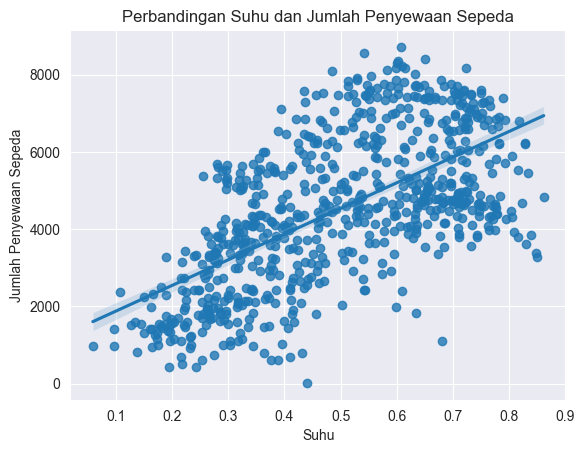

In [26]:
sns.regplot(x=df_day['temp'], y=df_day['cnt'])
plt.title('Perbandingan Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Dapat dilihat bahwa semakin tinggi temperatur, maka penyewaan sepeda semakin tinggi pula. Salah satu faktor yang dapat mempengaruhi kenaikan tersebut adalah semakin panas cuacanya, orang-orang semakin enggan untuk berjalan kaki dan lebih suka untuk berpergian cepat dengan menggunakan sepeda.

### Pertanyaan 2:
Pada jam berapa rata-rata penyewaan sepeda paling banyak?

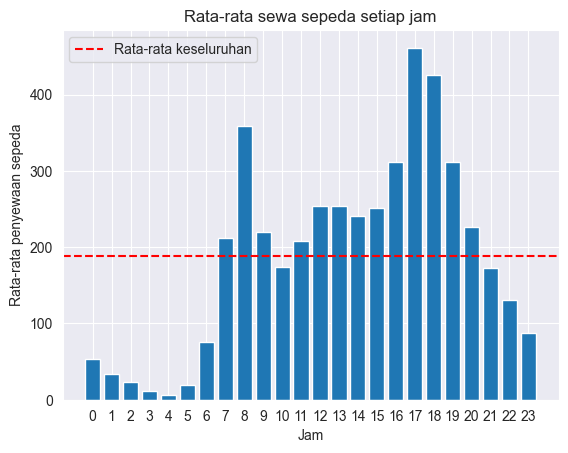

In [27]:
df = df_hour[['hr', 'cnt']].copy()
df = df.groupby(by="hr").mean().reset_index()

average_cnt = df['cnt'].mean()

plt.title('Rata-rata sewa sepeda setiap jam')
plt.axhline(y=average_cnt, color='r', linestyle='--', label='Rata-rata keseluruhan')
plt.bar(x=df['hr'], height=df['cnt'])
plt.xlabel('Jam')
plt.ylabel('Rata-rata penyewaan sepeda')
plt.xticks(df['hr'])
plt.legend()
plt.show()

Dari grafik diatas, dapat dilihat bahwa penyewaan sepeda memiliki lonjakan pada jam 8 dan juga sore hari pada jam 17 dan 18. Hal ini dapat dihubungkan dengan waktu kerja tradisional 09:00-17:00 di USA, tempat data diambil. Hal ini juga dapat dikaitkan dengan orang-orang yang hobi bersepeda di sore hari, dapat dijelaskan dengan selisih yang besar antara penyewaan sepeda di jam 8 dan jam 17.

## Conclusion

- Temperatur yang tinggi menyebabkan orang-orang lebih suka menyewa sepeda
- Penyewaan sepeda memiliki angka paling tinggi pada jam pulang kerja yaitu pukul 17:00-18:00